## Assignment 1
### Sher Afgan - u3247628

#### Notebook Summary
1.  Problem Statement
2.  Goal/Outcome
3.  Loading Datasets 
4.  Data Inspection 
5.  No of unique cusinies served by Sydney restaurants in 2018
6.  Top 3 suburbs with mos restaurants in Sydney 
7.  Agree or Disagree with 'Restaurants with excellent rating are mostly very expensive while those with poor rating are rarely expensive'
8.  Exploratory Data Analysis
9.  Cuisine Denstiry Map
10. Interactive Plots
11. Feature Engineering: Data Cleaning 
12. Feature Engineering: Data Encoding
13. Regression Analysis 
14. Classification 
15. Deployment 
16. 


#### 1. Problem Statement 
We are trying to analyze all restaurants in the Sydney area in 2018 with the objective of predicting each restaurant's potential success. As a data science student, the goal is to find the unknown patterns, or hidden gems that are impacting the performance of the resturants.

#### 2. Outcome
The outcome of this project will provide insights into key determinants of restaurant success in Sydney.


In [171]:
import ast
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import OneHotEncoder


#### 3. Loading Datasets: Reading The Zomato Dataframe

In [172]:
zomato_df = pd.read_csv("./data/zomato_df_final_data.csv")

#### 4. Data Inspection: Zomato Dataset

Before we start using the dataset, we will use the  

- Checking the total number of rows and columns.
- Printing column names and basic data types.
- Counting the number of features (columns).
- Identifying null or missing values.

In [173]:
rows, columns = zomato_df.shape
print(f"Total rows: {rows}")
print(f"Total columns: {columns} \n")

print("Feature (Column) Names:")
print(zomato_df.columns, "\n")

print("Dataframe information:")
print(zomato_df.info(), "\n")

Total rows: 10500
Total columns: 17 

Feature (Column) Names:
Index(['address', 'cost', 'cuisine', 'lat', 'link', 'lng', 'phone',
       'rating_number', 'rating_text', 'subzone', 'title', 'type', 'votes',
       'groupon', 'color', 'cost_2', 'cuisine_color'],
      dtype='object') 

Dataframe information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10500 entries, 0 to 10499
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   address        10500 non-null  object 
 1   cost           10154 non-null  float64
 2   cuisine        10500 non-null  object 
 3   lat            10308 non-null  float64
 4   link           10500 non-null  object 
 5   lng            10308 non-null  float64
 6   phone          10500 non-null  object 
 7   rating_number  7184 non-null   float64
 8   rating_text    7184 non-null   object 
 9   subzone        10500 non-null  object 
 10  title          10500 non-null  object 
 11  type  

In [174]:
print("Missing values per column:")
print(zomato_df.isnull().sum())

Missing values per column:
address             0
cost              346
cuisine             0
lat               192
link                0
lng               192
phone               0
rating_number    3316
rating_text      3316
subzone             0
title               0
type               48
votes            3316
groupon             0
color               0
cost_2            346
cuisine_color       0
dtype: int64


#### Identifying Number of Missing Values Per Column

Identifying missing values per column is a critical step in data analysis because missing data can significantly impact the results of your analysis or model. Identifying them helps assess the overall quality of your dataset, which is crucial before performing any analysis.

Similarly, the presence or absence of certain data might be indicative of a pattern that can be turned into a new feature which might help us in our features engineering process.

#### 5. No of unique cusinies served by Sydney restaurants in 2018

The goal of this task is to analyze the different cuisines served by restaurants in Sydney in 2018. We will identify all unique cuisines, determine their frequency across the restaurants, and visualize the results using plots.

However, if we look at the dataset, the cusinies are stored in a array/list data structure. For example, a restaurant can have multiple cusinies. We need to handle this case.

We found that there are **134** unique cusinies is the given dataset.

Total number of unique cuisines found
134


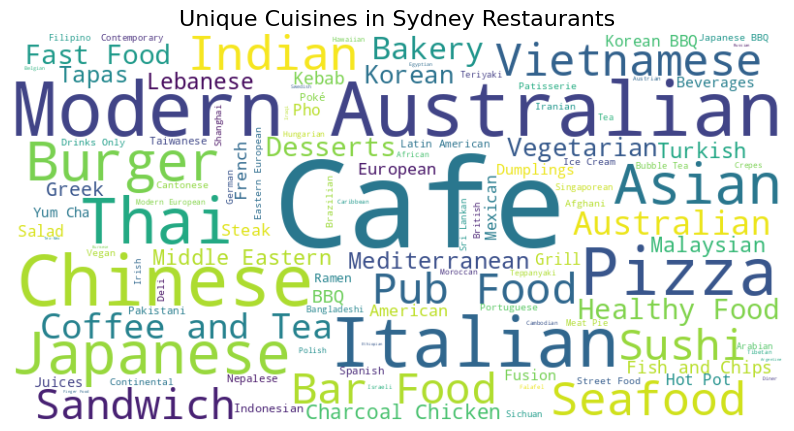

In [175]:
# Function to safely convert a string representation of a list into a list, if needed
def safely_convert_to_list(entry):
    if isinstance(entry, str): 
        try:
            return ast.literal_eval(entry) 
        except (ValueError, SyntaxError): 
            return [entry] 
    return entry

# Convert the string representation of lists into actual lists using ast.literal_eval
zomato_df['cuisine'] = zomato_df['cuisine'].apply(safely_convert_to_list)

# Explode the 'cuisine' column to convert each list into separate rows
exploded_cuisines = zomato_df['cuisine'].explode()

# Get the unique cuisines
unique_cuisines = exploded_cuisines.unique()

# Convert to list and print
unique_cuisines_list = unique_cuisines.tolist()

print("Total number of unique cuisines found")
print(unique_cuisines.size)

# Count the frequency of each unique cuisine in the exploded data
cuisine_counts = exploded_cuisines.value_counts()

# Generate word cloud for cuisine data
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(cuisine_counts)

# Display the word cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off the axis
plt.title('Unique Cuisines in Sydney Restaurants', fontsize=16)
plt.show()

#### 6. Top 3 suburbs that have the highest number of restaurants
This task involved identifying the top three suburbs in Sydney with the highest number of restaurants. For this we will utilize the **subzone** column to help in our analysis. After analyzing the dataset, a bar plot was generated to visualize the restaurant distribution across these suburbs.

subzone
CBD             476
Surry Hills     260
Parramatta      225
Darlinghurst    188
Chinatown       174
Name: count, dtype: int64


/tmp/ipykernel_683208/3811465692.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=suburb_counts[:3].values, y=suburb_counts[:3].index, palette='coolwarm')


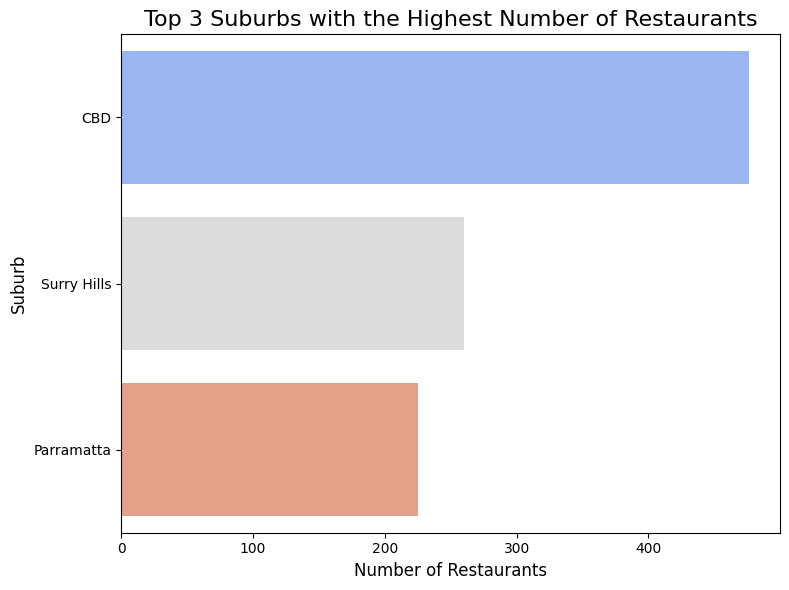

In [176]:
# Count the number of restaurants in each suburb (subzone in the dataset)
suburb_counts = zomato_df['subzone'].value_counts()

print(suburb_counts[0:5])

# Plot the top 3 suburbs with the highest number of restaurants
plt.figure(figsize=(8, 6))
sns.barplot(x=suburb_counts[:3].values, y=suburb_counts[:3].index, palette='coolwarm')

# Adding labels and title
plt.title('Top 3 Suburbs with the Highest Number of Restaurants', fontsize=16)
plt.xlabel('Number of Restaurants', fontsize=12)
plt.ylabel('Suburb', fontsize=12)

# Show the plot
plt.tight_layout()
plt.show()

#### 7. Do I agree or disagree with the statement ___Restaurants with 'excellent' ratings are mostly costly while those with 'poor'___.

After generating the cost distribution for ecxcellent and poor rated restaurants, I agree with the given statement based on the result that I have generated. I have found that the median cost for "Excellent" rated restaurants is higher compared to "Poor" rated ones. The range (interquartile range, or IQR) for "Excellent" restaurants generally shows higher costs, indicating that higher-end restaurants are more likely to receive excellent ratings. "Poor" rated restaurants tend to have a lower cost, with fewer outliers in the higher cost range.

/tmp/ipykernel_683208/3915055.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='rating_text', y='cost', data=df_filtered, palette="coolwarm")


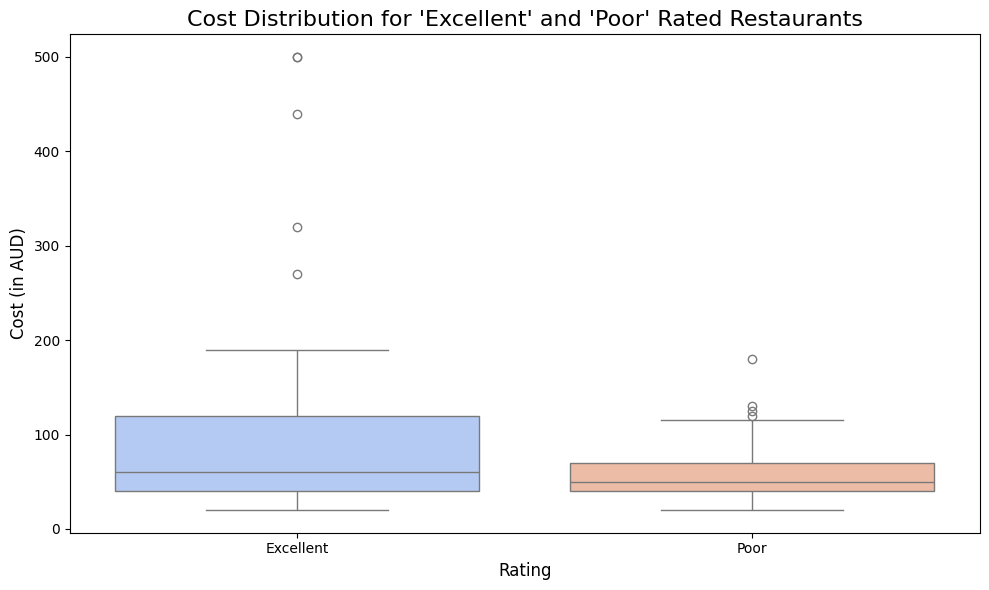

In [177]:
# Filter the dataframe for 'Excellent' and 'Poor' ratings
df_filtered = zomato_df[zomato_df['rating_text'].isin(['Excellent', 'Poor'])]

# Create a boxplot to show the distribution of cost for 'Excellent' and 'Poor' ratings
plt.figure(figsize=(10, 6))
sns.boxplot(x='rating_text', y='cost', data=df_filtered, palette="coolwarm")
plt.title("Cost Distribution for 'Excellent' and 'Poor' Rated Restaurants", fontsize=16)
plt.xlabel('Rating', fontsize=12)
plt.ylabel('Cost (in AUD)', fontsize=12)
plt.tight_layout()
plt.show()


### 8. Exploratory Data Analysis 

Before moving the modeling part, we will try to analyze our data further to discover hidden patterns, relationships, finding missing values and outliers. 

1. Visualize the missing values for important columns such as cost, cuisine, rating, votes and subzone
2. Find outliers in the cost variables. 
3. Find the correlation between columns.

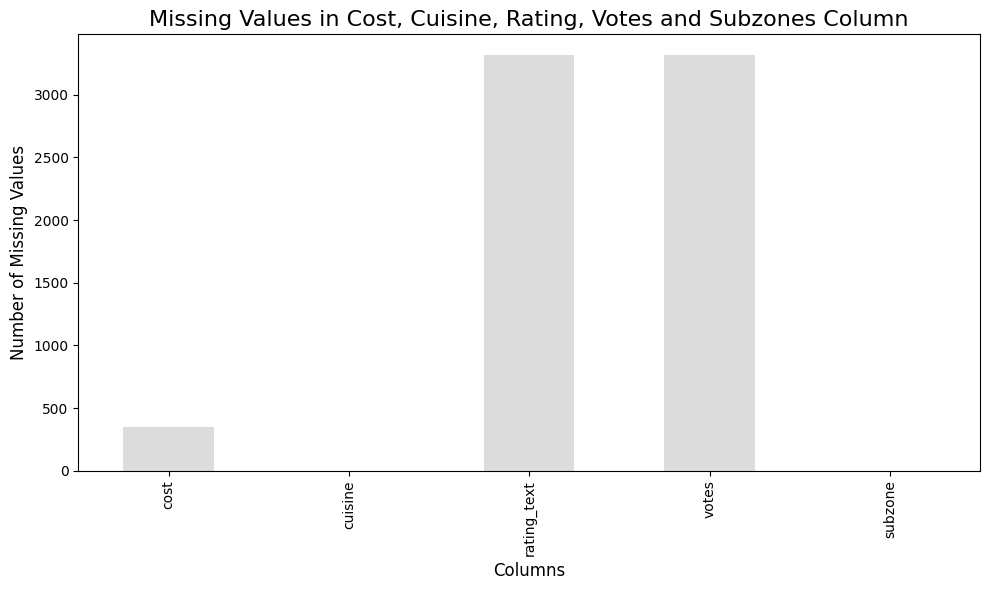

In [178]:
# Calculate the number of missing values per column
missing_data = zomato_df[['cost', 'cuisine', 'rating_text', 'votes', 'subzone']].isnull().sum()

# Create a bar plot for missing values
plt.figure(figsize=(10, 6))
missing_data.plot(kind='bar', color=plt.get_cmap('coolwarm')(0.5))
plt.title('Missing Values in Cost, Cuisine, Rating, Votes and Subzones Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Number of Missing Values', fontsize=12)
plt.tight_layout()
plt.show()

Identifying missing values per column is a critical step in data analysis because missing data can significantly impact the results of your analysis or model. Identifying them helps assess the overall quality of your dataset, which is crucial before performing any analysis. From the above graph we can see that cost, rating and votes all have missing values.

While the subzone, and cuisines do not have any missing values.

/tmp/ipykernel_683208/2608798751.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=zomato_df['cost'], palette="coolwarm")


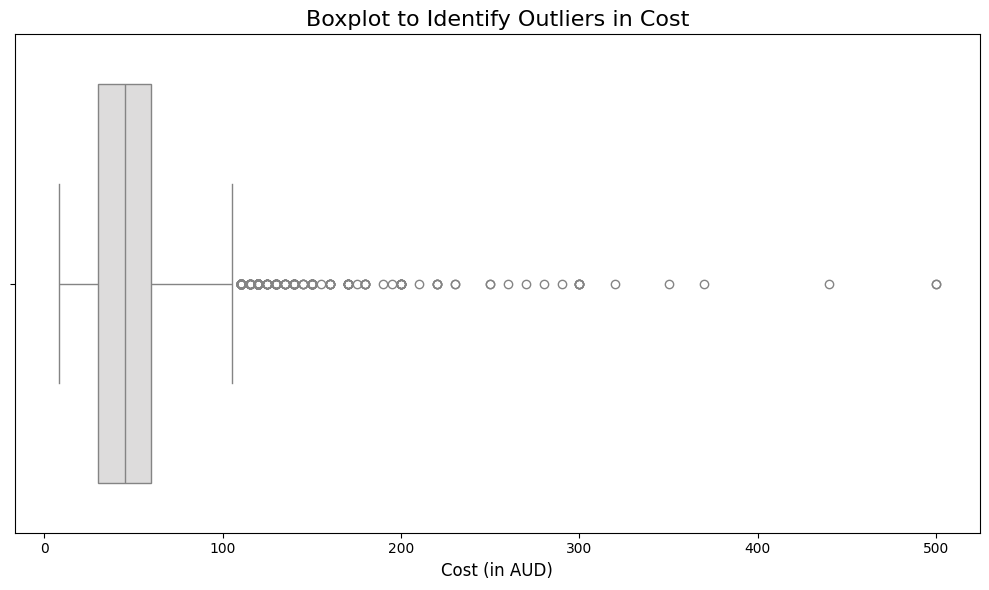

In [180]:
# Create a boxplot for the 'cost' variable to detect outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=zomato_df['cost'], palette="coolwarm")

# Adding labels and title
plt.title('Boxplot to Identify Outliers in Cost', fontsize=16)
plt.xlabel('Cost (in AUD)', fontsize=12)
plt.tight_layout()
plt.show()

It looks like there are many outliers in the cost column. However, we will not be removing these entries because this is real data and the cost variability is expected. Similarly, these outliers may indicate unique business strategies or customer demographics that are valuable for analysis. Also, outliers do not always represent errors. 

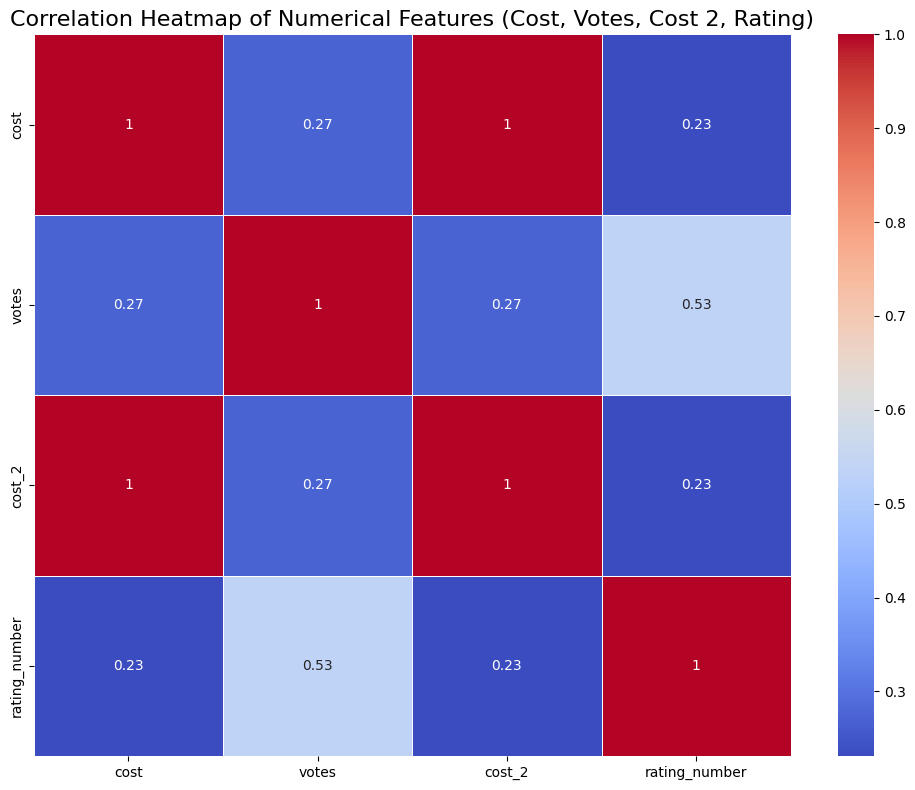

In [188]:
# Calculate the correlation matrix
corr_matrix = zomato_df[['cost', 'votes', 'cost_2', 'rating_number']].corr()

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)

# Adding labels and title
plt.title('Correlation Heatmap of Numerical Features (Cost, Votes, Cost 2, Rating)', fontsize=16)
plt.tight_layout()
plt.show()

The correlation matrix tells us that cost and cost_2 columns are directly related and represent the same thing. This is why we will only use cost variable as one of our target variable going forward instead of cost_2.

Also we found that votes and rating have a high correlation value of 0.53.